# Introduction to Data Visualization with Matplotlib

👋 Welcome to your workspace! Here, you can write and run Python code and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). Below, we've imported the datasets from the course _Introduction to Data Visualization with Matplotlib_ as DataFrames as well as the packages used in the course. This is your sandbox environment: analyze the course datasets further, take notes, or experiment with code!

In [4]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
climate_change = pd.read_csv('climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('summer2016.csv')
austin_weather = pd.read_csv("austin_weather.csv", index_col="DATE")
weather = pd.read_csv("seattle_weather.csv", index_col="DATE")
# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

austin_weather.head() 

/var/folders/fp/bhc0ytp57533fd1q0g_9swtr0000gn/T/ipykernel_26793/3031747835.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather["MONTH"] = month


,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH
DATE,,,,,,,,,,,,,,,,,,,,,
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",190,103,50,35,18,1,-7777,5,...,310,36.3,298,570,839,967,997,1000,2.9,Jan
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",228,132,68,49,29,3,1,11,...,280,39.4,103,327,614,867,973,999,3.2,Feb
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",446,306,185,146,98,13,6,42,...,308,46.6,10,73,242,494,761,928,3.6,Mar
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",668,519,373,318,240,53,32,130,...,287,54.7,0,0,0,48,189,453,4.1,Apr
5,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",936,781,626,564,471,181,134,319,...,250,63.7,0,0,0,0,0,0,2.5,May


In [7]:
austin_weather.head()

,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH
DATE,,,,,,,,,,,,,,,,,,,,,
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",190,103,50,35,18,1,-7777,5,...,310,36.3,298,570,839,967,997,1000,2.9,Jan
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",228,132,68,49,29,3,1,11,...,280,39.4,103,327,614,867,973,999,3.2,Feb
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",446,306,185,146,98,13,6,42,...,308,46.6,10,73,242,494,761,928,3.6,Mar
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",668,519,373,318,240,53,32,130,...,287,54.7,0,0,0,48,189,453,4.1,Apr
5,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",936,781,626,564,471,181,134,319,...,250,63.7,0,0,0,0,0,0,2.5,May


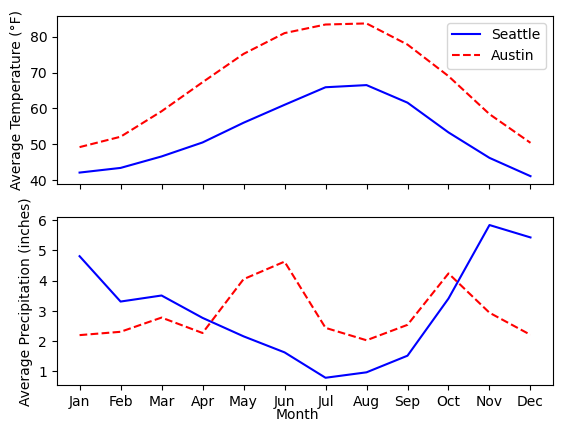

In [10]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], color="blue", linestyle="-", label="Seattle")


axs[0].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], color="red", linestyle="--", label="Austin")


axs[1].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color="blue", linestyle="-", label="Seattle")


axs[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color="red", linestyle="--", label="Austin")


axs[0].set_ylabel("Average Temperature (°F)")
axs[1].set_ylabel("Average Precipitation (inches)")


fig.text(0.5, 0.04, "Month", ha="center")


axs[0].legend()


plt.show()


### Don't know where to start?

Try completing these tasks:
- Using `austin_weather` and `seattle_weather`, create a Figure with an array of two Axes objects that share a y-axis range (`MONTHS` in this case). Plot Seattle's and Austin's `MLY-TAVG-NORMAL` (for average temperature) in the top Axes and plot their `MLY-PRCP-NORMAL` (for average precipitation) in the bottom axes. The cities should have different colors and the line style should be different between precipitation and temperature. Make sure to label your viz!
- Using `climate_change`, create a twin Axes object with the shared x-axis as time. There should be two lines of different colors not sharing a y-axis: `co2` and `relative_temp`. Only include dates from the 2000s and annotate the first date at which `co2` exceeded 400.
- Create a scatter plot from `medals` comparing the number of Gold medals vs the number of Silver medals with each point labeled with the country name.
- Explore if the distribution of `Age` varies in different sports by creating histograms from `summer_2016`. 
- Try out [the different Matplotlib styles available](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and save your visualizations as a PNG file.

In [11]:
climate_change.head()


,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
